<a href="https://colab.research.google.com/github/gabriellemacinnes/Clothing-Identifier/blob/main/Clothing_Identifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# import statements
import sys
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from matplotlib import pyplot as plt

In [17]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
# to log, pass the string "log" as arg when running the file
DO_LOG = "log" in sys.argv

# training of dataset
labels = pd.read_csv('train_labels.csv')  # read labels
train_images = np.load('train_images.npy') # load train images
del labels["ID"]
train_images = np.expand_dims(train_images, axis=3)

# mapping
label_mapping = pd.read_csv('label_int_to_str_mapping.csv')  # read label mapping
train_images.shape

(50000, 28, 28, 1)

In [23]:
# testing part of dataset
sample_submission = pd.read_csv('sample_submission.csv') # read sample_submission
test_images = np.load('test_images.npy') # load test images

# Normalize the data
train_images_norm = train_images / 255
test_images_norm = test_images / 255



    

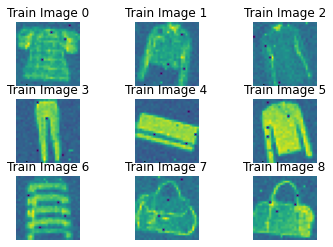

In [24]:
# plot the first 9 images
f, axarr = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        axarr[i, j].imshow(train_images[i*3+j].reshape(28, 28))
        axarr[i, j].set_title(f"Train Image {i*3+j}")
        axarr[i, j].axis('off')

plt.show()

In [25]:
def define_model():
    """
    This function defines the CNN model.
    """
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, train_images, train_labels, label_mapping):
    """
    This function trains the model.
    """
    # train the model
    model.fit(train_images, train_labels, epochs=10)

    # evaluate the model
    scores = model.evaluate(train_images, train_labels)
    print(f"\n{model.metrics_names[1]}: {scores[1]*100}%")

    # save the model
    model.save('model.h5')



In [26]:
def main():
    """
    This function is the main function.
    """
    # define the model
    model = define_model()
    

    # train the model
    train_model(model, train_images_norm, labels.values, label_mapping)

    #quit()
    
    # evaluate the model
    scores = model.evaluate(train_images_norm, labels.values)
    print(f"\n{model.metrics_names[1]}: {scores[1]*100}%")

    # predict the test set
    predictions = model.predict(test_images_norm)

    # create the submission file
    sample_submission.prediction = predictions.argmax(axis=1)
    sample_submission.to_csv('submission.csv', index=False)

if __name__ == "__main__":
    main()

Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6503 - accuracy: 0.7631
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.4706 - accuracy: 0.8287
Epoch 3/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.4174 - accuracy: 0.8479
Epoch 4/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.3799 - accuracy: 0.8604
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.3487 - accuracy: 0.8731
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.3190 - accuracy: 0.8816
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2931 - accuracy: 0.8918
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2654 - accuracy: 0.9031
Epoch 9/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2412 - accuracy: 0.9114
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
